In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
payroll = pd.read_csv("City_Payroll_data.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_2524\2630117391.py:1: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  payroll = pd.read_csv("City_Payroll_data.csv")


In [5]:
payroll.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [7]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [11]:
payroll.isnull().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department              53545
Record Number                       0
Job Class Title                     0
Employment Type                     0
Hourly or Event Rate            21021
Projected Annual Salary             0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                    42264
Overtime Pay                      434
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                             21021
MOU Title                       21021
FMS Departme

In [13]:
payroll.describe()

,Row ID,Year,Payroll Department,FMS Department,Job Class
count,285008.000000,285008.000000,231463.000000,285008.000000,285008.000000
mean,142544.329759,2014.786701,4557.472067,66.271340,3051.039967
std,82330.135857,1.161369,2508.764234,29.304236,2038.694130
min,1.000000,2013.000000,101.000000,2.000000,1.000000
25%,71252.750000,2014.000000,3001.000000,42.000000,1960.000000
50%,142504.500000,2015.000000,4301.000000,70.000000,2234.000000
75%,213756.250000,2016.000000,7031.000000,88.000000,3580.000000
max,285208.000000,2016.000000,8702.000000,98.000000,9998.000000


In [15]:
payroll.columns

Index(['Row ID', 'Year', 'Department Title', 'Payroll Department',
       'Record Number', 'Job Class Title', 'Employment Type',
       'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
       '% Over Base Pay', 'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'MOU', 'MOU Title', 'FMS Department',
       'Job Class', 'Pay Grade', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost', 'Benefits Plan',
       'Job Class Link'],
      dtype='object')

In [17]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])] #Getting those wothout null values
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [19]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i]= payroll[i].str.replace('$','')

In [21]:
payroll = payroll[payroll.Annual_sal !=0]
payroll = payroll[payroll.Base_Pay !=0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

In [23]:
payroll.describe()

,Row ID,Year,Payroll Department,Annual_sal,Base_Pay,FMS Department,Job Class
count,231463.000000,231463.000000,231463.000000,231463.000000,231463.000000,231463.000000,231463.000000
mean,136806.647516,2014.779965,4557.472067,77030.493381,49660.756674,58.931458,2875.271482
std,81747.284006,1.162597,2508.764234,33504.859690,37578.417845,27.760291,1926.587256
min,1.000000,2013.000000,101.000000,0.000000,-878.700000,2.000000,1.000000
25%,68151.500000,2014.000000,3001.000000,52325.280000,17354.400000,38.000000,2112.000000
50%,136753.000000,2015.000000,4301.000000,76123.260000,44148.850000,70.000000,2223.000000
75%,205698.500000,2016.000000,7031.000000,98365.680000,82211.830000,82.000000,3211.000000
max,274361.000000,2016.000000,8702.000000,360743.760000,359361.600000,94.000000,9807.000000


<Axes: xlabel='Annual_sal', ylabel='Count'>

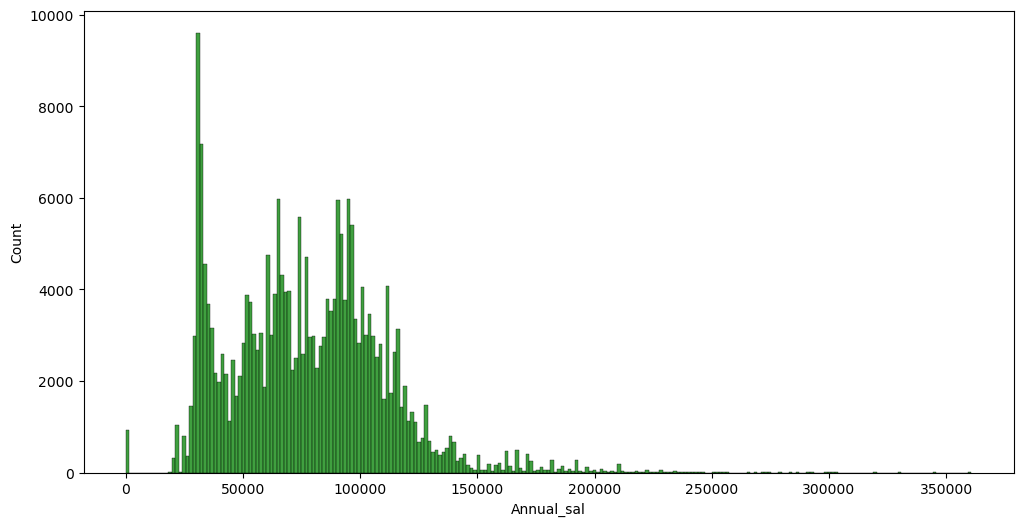

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(payroll.Annual_sal, color='green')

### CREATING DIFERENT SAMPLES FROM POPULATION

In [31]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]
payroll_2015_sample = payroll_2015.sample(n=2500)
payroll_2016_sample = payroll_2016.sample(n = 2500)
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2014_sample = payroll_2014.sample(n = 2500)

## **Calculating the Population Parameters**

In [46]:
import statistics

# 2014
pop_mean_2014 = payroll_2014['Annual_sal'].mean()
pop_std_2014 = statistics.stdev(payroll_2014['Annual_sal'].tolist())  # Ensure list format
sample_mean_2014 = payroll_2014_sample['Annual_sal'].mean()  # Ensure correct column selection

print(f"Population Mean 2014: {pop_mean_2014}")
print(f"Population Standard Deviation 2014: {pop_std_2014}")
print(f"Sample Mean 2014: {sample_mean_2014}")

# 2015
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015['Annual_sal'].tolist())  
sample_mean_2015 = payroll_2015_sample['Annual_sal'].mean()

print(f"Population Mean 2015: {pop_mean_2015}")
print(f"Population Standard Deviation 2015: {pop_std_2015}")
print(f"Sample Mean 2015: {sample_mean_2015}")

# 2016
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016['Annual_sal'].tolist())  
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
sample_std_2016 = payroll_2016_sample['Annual_sal'].std()

print(f"Population Mean 2016: {pop_mean_2016}")
print(f"Population Standard Deviation 2016: {pop_std_2016}")
print(f"Sample Mean 2016: {sample_mean_2016}")
print(f"Sample Standard Deviation 2016: {sample_std_2016}")


Population Mean 2014: 77318.90544252573
Population Standard Deviation 2014: 33173.322294894715
Sample Mean 2014: 76416.22532800001
Population Mean 2015: 76046.39152504776
Population Standard Deviation 2015: 34232.25489729045
Sample Mean 2015: 75460.810432
Population Mean 2016: 78711.19987224769
Population Standard Deviation 2016: 33572.9812108376
Sample Mean 2016: 77913.940768
Sample Standard Deviation 2016: 33278.824779669034


In [48]:
print(stats.ttest_rel(payroll_2014_sample['Annual_sal'],payroll_2015_sample['Annual_sal'], axis=0))
print(stats.ttest_rel(payroll_2014_sample['Annual_sal'],payroll_2016_sample['Annual_sal'], axis=0))
print(stats.ttest_rel(payroll_2015_sample['Annual_sal'],payroll_2016_sample['Annual_sal'], axis=0))

TtestResult(statistic=1.040521490245847, pvalue=0.29819834162297815, df=2499)
TtestResult(statistic=-1.6000274380120736, pvalue=0.10971890123229835, df=2499)
TtestResult(statistic=-2.619943035954688, pvalue=0.008847667267000751, df=2499)


In [50]:
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

Sample Mean 2014 69805.02799999999
Sample Mean 2015 74172.59085714286
Sample Mean 2016 30223.13171428572


### One way ANOVE FOR THE 3 YEARS BASE PAYS

In [53]:
f,p= stats.f_oneway(sam_1, sam_2, sam_3)
print(f,' : ',p)

52.69519819036885  :  1.91596704639492e-16


#### P-value = 1.91596704639492e-16 (which is far less than 0.05) → Reject H₀.

Conclusion:

There is strong evidence that at least one of the sample means is significantly different from the others. You can proceed with a


post-hoc test (like Tukey's HSD or pairwise t-tests) to determine which specific groups differ.

In [63]:
# Creating a DataFrame for Tukey's test
Tukey = pd.DataFrame({
    "values": np.concatenate([sam_1, sam_2, sam_3]),
    "groups": (["sam_1"] * len(sam_1)) + 
              (["sam_2"] * len(sam_2)) + 
              (["sam_3"] * len(sam_3))
})

In [65]:
Tukey.head()

,values,groups
0,80434.19,sam_1
1,79379.48,sam_1
2,79379.48,sam_1
3,79379.48,sam_1
4,79379.49,sam_1


In [67]:
tukey = pairwise_tukeyhsd(Tukey['values'], Tukey['groups'], alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
 sam_1  sam_2   4367.5629 0.6252  -6851.2938  15586.4195  False
 sam_1  sam_3 -39581.8963    0.0 -50800.7529 -28363.0396   True
 sam_2  sam_3 -43949.4591    0.0 -55168.3158 -32730.6025   True
---------------------------------------------------------------


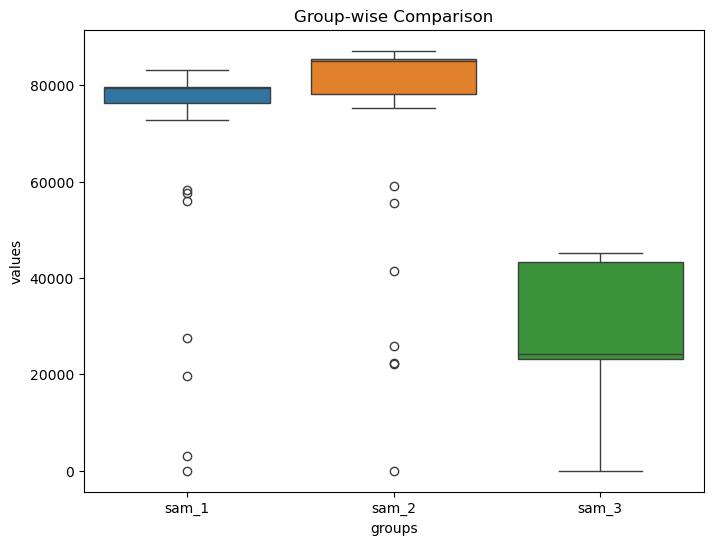

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(x='groups', y='values',hue='groups', data=Tukey)
plt.title("Group-wise Comparison")
plt.show()